In [1]:
# 2020-02-04 at Office
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from  torch.autograd import Variable
import torch.optim as optim
from torchvision import datasets, transforms
import torchvision.models as models
#import lenstronomy.Util.image_util as image_util
import os, sys
import h5py
import pandas as pd
import numpy as np
import scipy.ndimage
from scipy.ndimage import gaussian_filter
from scipy.ndimage import rotate
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tqdm import tqdm
import gc
import astropy
from astropy.io import fits
from astropy.table import Table


root_folder = "/media/joshua/HDD_fun2/Lens_finder_test/Public/"


df_submission = pd.read_csv("./2020-02-02Lens_finding_challenge_submission.csv")

df_submission

/home/joshua/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/joshua/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/joshua/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/joshua/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/joshua/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may

,Unnamed: 0,ID,score
0,0,200001,0.216868
1,1,200002,0.954940
2,2,200003,0.139888
3,3,200004,0.114642
4,4,200005,0.427066
5,5,200006,0.348360
6,6,200007,0.777832
7,7,200008,0.453382
8,8,200009,0.147113
9,9,200010,0.277629


score 0    0.216868
Name: score, dtype: float64


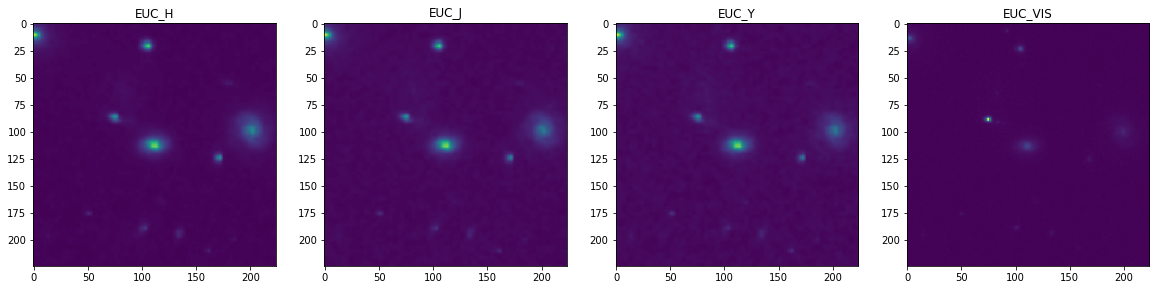

score 1    0.95494
Name: score, dtype: float64


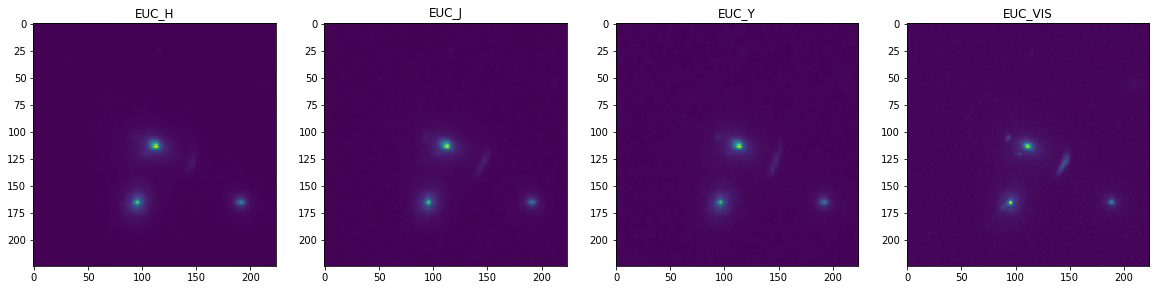

score 2    0.139888
Name: score, dtype: float64


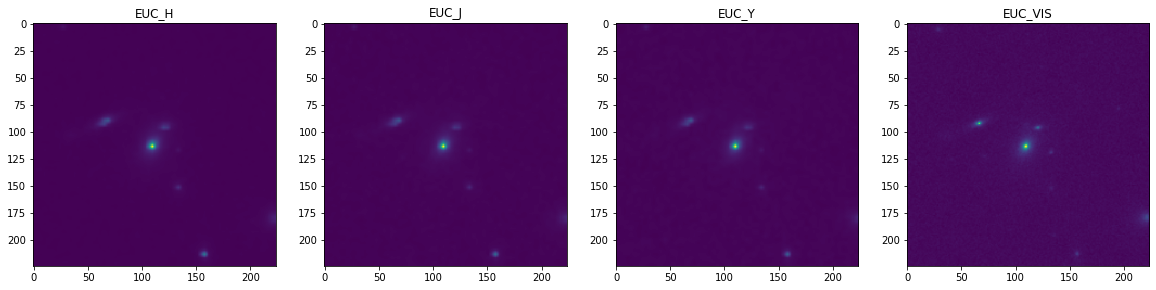

score 3    0.114642
Name: score, dtype: float64


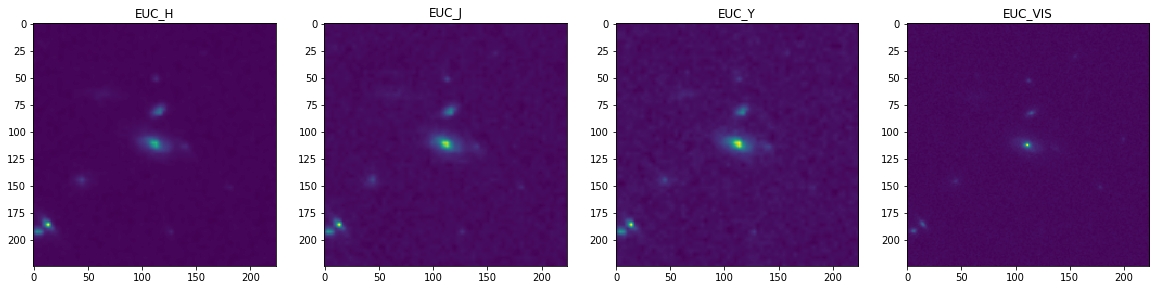

score 4    0.427066
Name: score, dtype: float64


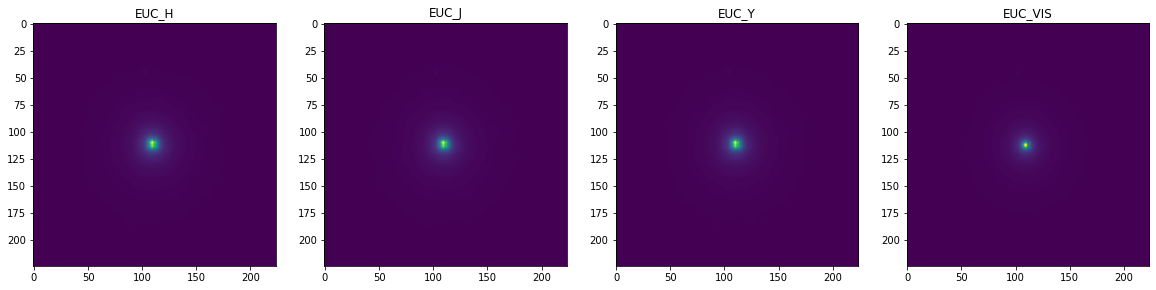

score 5    0.34836
Name: score, dtype: float64


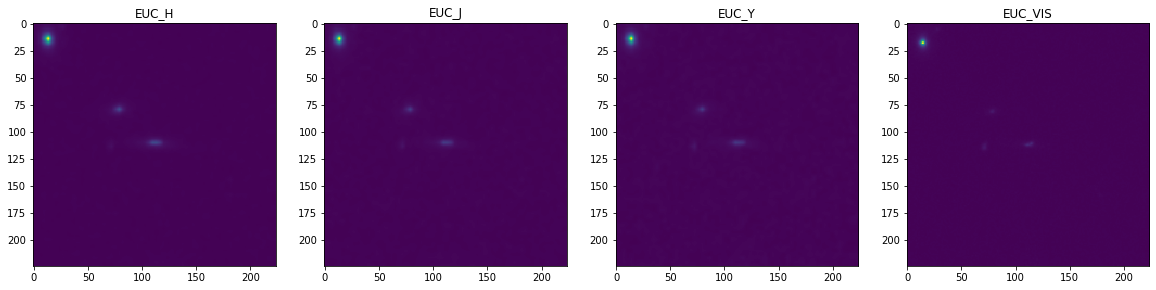

score 6    0.777832
Name: score, dtype: float64


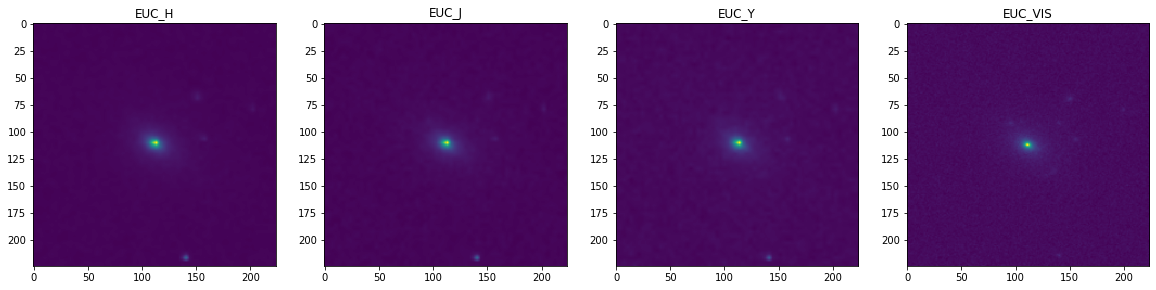

score 7    0.453382
Name: score, dtype: float64


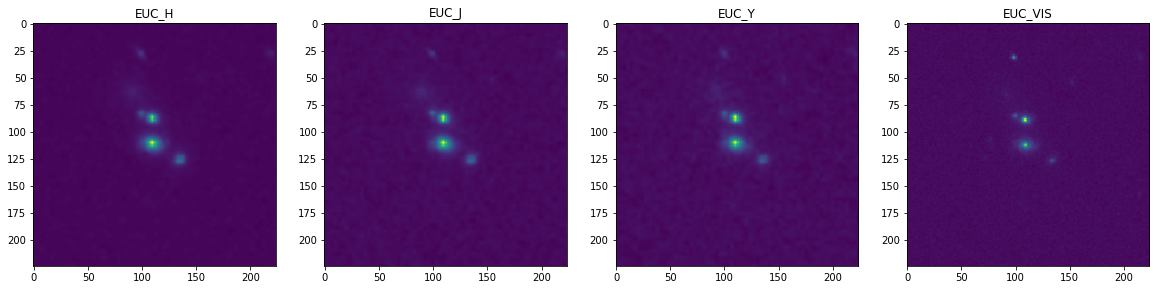

score 8    0.147113
Name: score, dtype: float64


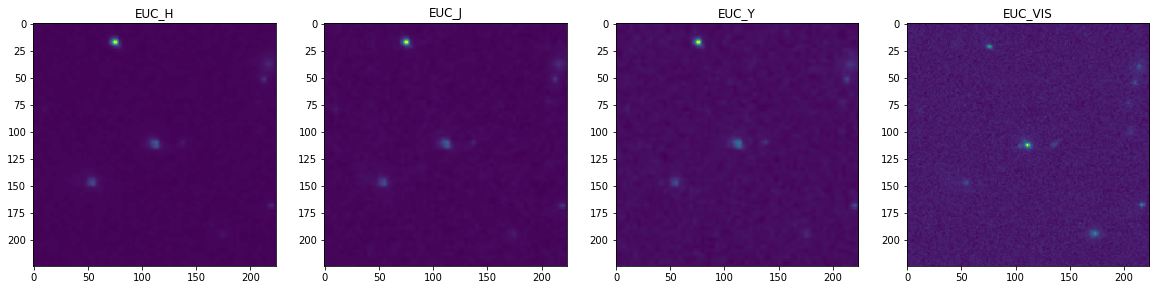

In [5]:
for ID in range(200001, 200010):
    print("score", df_submission[df_submission['ID']==ID]['score'])
    image = np.zeros((4, 224, 224))
    channel_names = ['EUC_H', 'EUC_J', 'EUC_Y', 'EUC_VIS']
    plt.figure(figsize=(20, 5))
    for i, channel in enumerate(channel_names):
        filepath = root_folder + channel + "/image" + channel + "-" + str(ID) + ".fits"
        lens_data = fits.open(filepath)
        img = lens_data[0].data
        img_channel_0 = scipy.ndimage.zoom(img, 224/img.shape[0], order=1)
        image[i, :, :] += img_channel_0
        plt.subplot(1, 4, i+ 1)
        plt.imshow(image[i, :, :])
        plt.title(channel)
    plt.show()

score 0.954939603805542


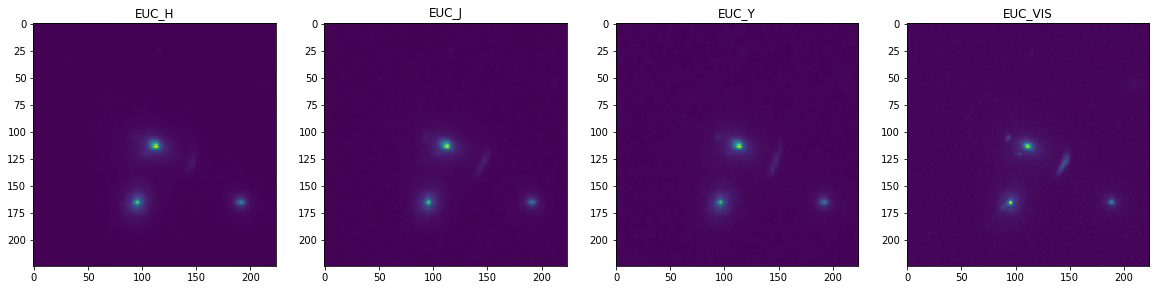

score 0.9938416481018066


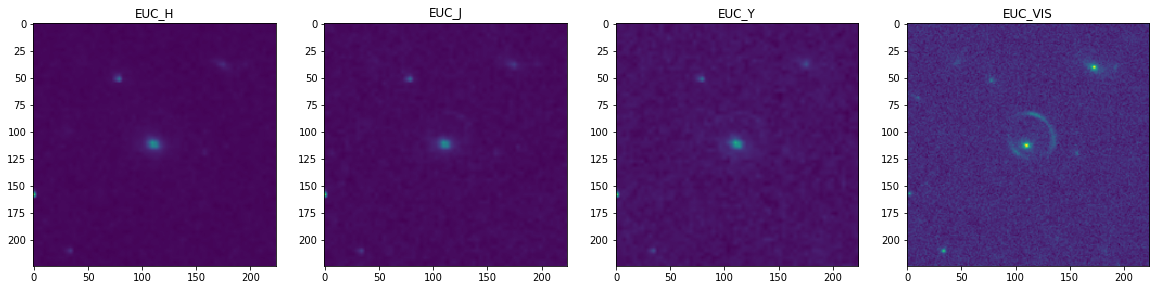

score 0.9951841235160828


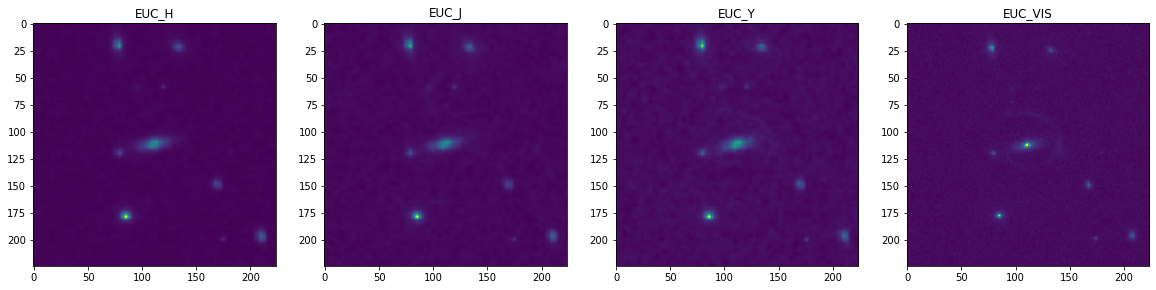

score 0.9243154525756836


In [ ]:
df_lens = df_submission[df_submission['score'] > 0.9]

count = 0
for ID in df_lens['ID']:
    count += 1
    print("score", df_submission[df_submission['ID']==ID].score.values[0])
    image = np.zeros((4, 224, 224))
    channel_names = ['EUC_H', 'EUC_J', 'EUC_Y', 'EUC_VIS']
    plt.figure(figsize=(20, 5))
    for i, channel in enumerate(channel_names):
        filepath = root_folder + channel + "/image" + channel + "-" + str(ID) + ".fits"
        lens_data = fits.open(filepath)
        img = lens_data[0].data
        img_channel_0 = scipy.ndimage.zoom(img, 224/img.shape[0], order=1)
        image[i, :, :] += img_channel_0
        plt.subplot(1, 4, i+ 1)
        plt.imshow(image[i, :, :])
        plt.title(channel)
    plt.show()
    if count > 10:
        break